# Feature selection - L1 Regularization

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', penalty='l1', C=0.1, multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


In [7]:
print(lr.intercept_)

[-0.38379609 -0.15809122 -0.70038702]


In [8]:
for count, coef in enumerate(lr.coef_):
    coef_print = ", ".join(f"{i:5.2f}" for i in coef)
    print(f"(Model:{count}) Coefs: {coef_print}")

(Model:0) Coefs:  0.28,  0.00,  0.00, -0.03,  0.00,  0.00,  0.71,  0.00,  0.00,  0.00,  0.00,  0.00,  1.24
(Model:1) Coefs: -0.64, -0.07, -0.06,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00, -0.93,  0.06,  0.00, -0.37
(Model:2) Coefs:  0.00,  0.06,  0.00,  0.00,  0.00,  0.00, -0.64,  0.00,  0.00,  0.50, -0.36, -0.57,  0.00


In [9]:
#Calculate weight values for different values of C
cols = dataObj.feature_names
df2 = pd.DataFrame(columns=np.append(['C'], cols))
df2 = df2.set_index('C')
for c in np.arange(-4., 6.):
    C = 10.**c
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=C, random_state=0, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    df2.loc[C] =  lr.coef_[1]
    
display(df2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
C,,,,,,,,,,,,,
0.0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1000,-0.644110,-0.068765,-0.057217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.926417,0.060406,0.000000,-0.371091
1.0000,-0.934659,-0.583596,-0.935304,0.466364,0.000000,0.000000,0.000000,0.040012,0.494097,-2.456557,1.014323,0.000000,-2.175359
10.0000,-1.691368,-1.478845,-2.635304,1.680839,0.000000,0.000000,0.841447,1.146020,0.902220,-7.314875,2.123685,0.000000,-5.909371
100.0000,-3.085809,-2.599786,-4.873887,3.040399,0.000000,0.000000,1.895667,2.407467,1.410415,-14.246740,4.020774,0.000000,-11.659531
1000.0000,-4.529538,-3.364650,-6.999457,4.021726,0.473575,-0.037816,2.985964,3.670595,1.887662,-19.433533,5.641556,0.103158,-16.562969
10000.0000,-5.394997,-3.699731,-7.875814,4.159775,0.949162,-0.405389,3.388050,4.348711,1.996341,-21.043513,6.274438,0.670584,-18.464271


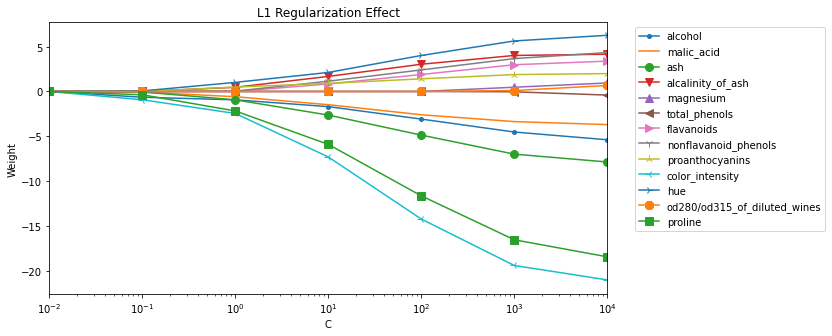

In [10]:
# Plot the results
import seaborn as sns
cols = df2.columns.values
colors = sns.color_palette(n_colors=len(cols))
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
markers = markers[:len(cols)]

fig, ax = plt.subplots(figsize=(10,5))
for col, color, marker in zip(cols,colors,markers):
    ax.plot(df2[col],label=col,color=color,marker=marker,markersize=8)

ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlim([10.**-2, 10.**4])
ax.set_title('L1 Regularization Effect')
ax.set_xlabel('C')
ax.set_ylabel('Weight')
plt.show()

- Installing seaborn package

```python conda install -c anaconda seaborn ```

- Alternatively
```python 
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)] ```